In [ ]:
from google.colab import files

# Upload file manually
uploaded = files.upload()


Saving Cognitive.csv to Cognitive.csv


In [ ]:
df.dtypes


,0
Athlete,object
Date,object
Day.of.Week,object
PPC,float64
MPC,float64
EB,float64
OR,float64
MS,float64
LA,float64
NES,float64


In [25]:
import pandas as pd

df = pd.read_csv("Cognitive.csv")

# Display the first few rows
df.head()


,Athlete,Date,Day.of.Week,PPC,MPC,EB,OR,MS,LA,NES,OS,RSI
0,Athlete 1 Bergdorf,01-01-2022,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN
1,Athlete 1 Bergdorf,01-10-2022,Monday,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,0.33
2,Athlete 1 Bergdorf,01-11-2022,NaN,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,NaN
3,Athlete 1 Bergdorf,01-12-2022,NaN,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,NaN
4,Athlete 1 Bergdorf,1/13/2022,Thursday,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,NaN


In [26]:
# Describe the dataset summary statistics for numerical columns
df.describe()


,PPC,MPC,EB,OR,MS,LA,NES,OS,RSI
count,1615.000000,1615.000000,1601.000000,1615.000000,1597.000000,1367.000000,1351.000000,1526.000000,186.000000
mean,3.870588,4.192570,3.726421,3.469969,3.376331,2.983175,3.182087,3.362385,0.377742
std,1.238066,1.291741,1.307233,1.155852,1.222908,1.194979,1.505350,1.260393,0.078094
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,0.330000
50%,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.365000
75%,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.410000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.670000


In [27]:
# Describe categorical columns
df.describe(include=['object'])


,Athlete,Date,Day.of.Week
count,3111,3111,1987
unique,17,183,7
top,Athlete 1 Bergdorf,01-01-2022,Tuesday
freq,183,17,308


In [28]:
# Check for missing values in each column
df.isnull().sum()


,0
Athlete,0
Date,0
Day.of.Week,1124
PPC,1496
MPC,1496
EB,1510
OR,1496
MS,1514
LA,1744
NES,1760


In [29]:
# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

In [30]:
df['Day.of.Week'] = df['Day.of.Week'].fillna(df['Day.of.Week'].mode()[0])

In [31]:
# Median imputation for 'MPC'
df['MPC'] = df['MPC'].fillna(df['MPC'].median())

In [32]:
df['RSI'] = df['RSI'].fillna(df['RSI'].median())  # Median

In [33]:
df['PPC'] = df['PPC'].fillna(df['PPC'].median())  # Median

In [34]:
df['EB'] = df['EB'].fillna(df['EB'].median())  # Median

In [35]:
df['OR'] = df['OR'].fillna(df['OR'].median())  # Median

In [36]:
df['MS'] = df['MS'].fillna(df['MS'].median())  # Median

In [37]:
df['LA'] = df['LA'].fillna(df['LA'].median())  # Median

In [38]:
df['NES'] = df['NES'].fillna(df['NES'].median())  # Median

In [39]:
df['OS'] = df['OS'].fillna(df['OS'].median())  # Median

In [40]:
# Check for missing values in each column
df.isnull().sum()


,0
Athlete,0
Date,0
Day.of.Week,0
PPC,0
MPC,0
EB,0
OR,0
MS,0
LA,0
NES,0


In [41]:
# Drop date columns
df = df.drop(columns=['Date'], errors='ignore')  # Replace 'Date' with actual column names


In [42]:
# Step 1: Check if 'Date' column exists
if 'Date' in df.columns:
    # Step 2: Convert to datetime, handling errors
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Step 3: Extract day, month, year
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

    # Step 4: Drop original date column safely
    df.drop(columns=['Date'], inplace=True)


In [43]:
df = df.drop(columns=[col for col in df.columns if 'Athlete_' in col], errors='ignore')


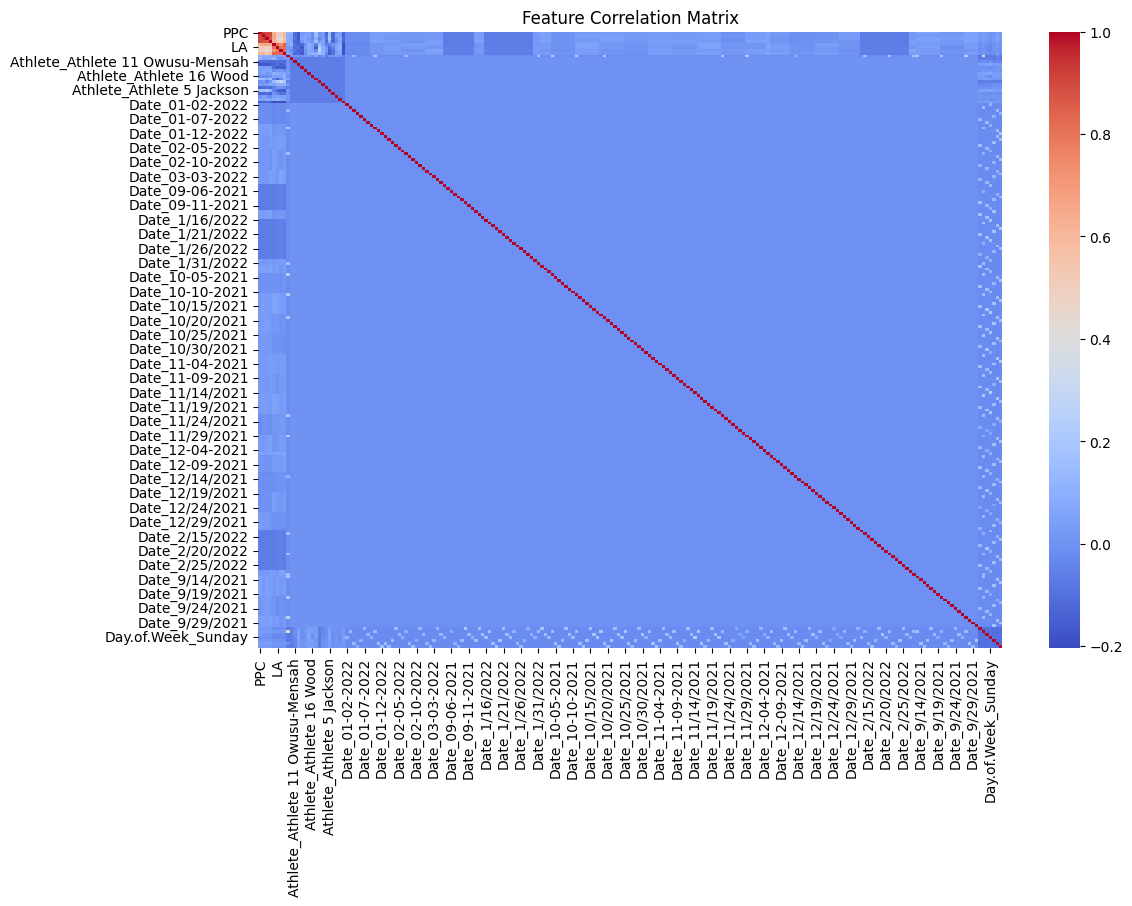

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Cognitive.csv")

# Handling missing values
df.fillna(0, inplace=True)

# Convert categorical variables to numerical
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Ensure correlation matrix is not empty
if corr_matrix.shape[0] < 2:
    print("Error: Correlation matrix is too small. Check data preprocessing!")
else:
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Matrix")
    plt.show()


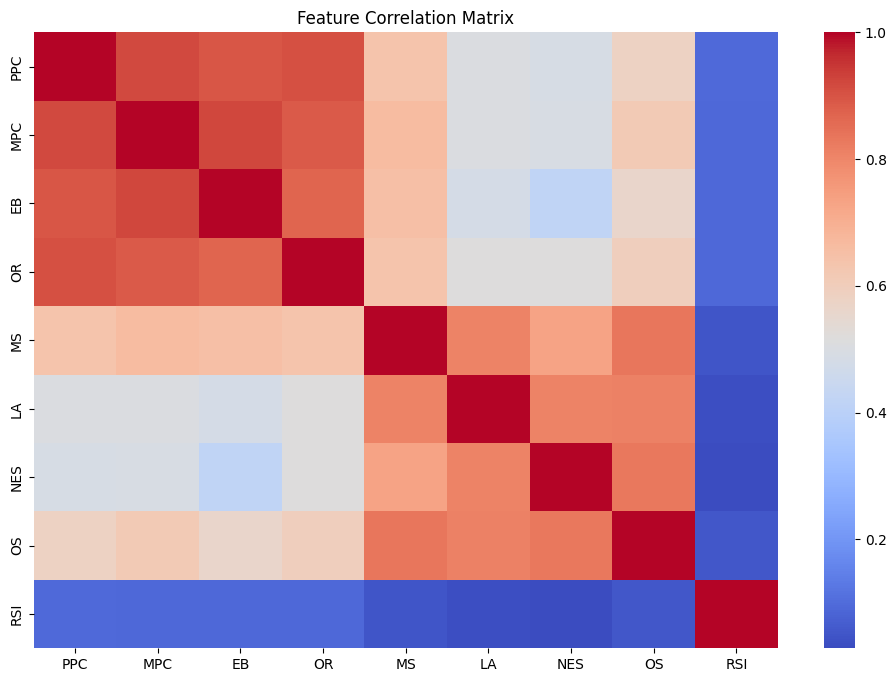

In [45]:
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


In [46]:
import numpy as np

# Set threshold for high correlation
threshold = 0.9

# Compute correlation matrix
corr_matrix = df_encoded.corr().abs()

# Find columns that are highly correlated
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop highly correlated features
df_selected = df_encoded.drop(columns=to_drop)

print(f"Removed {len(to_drop)} highly correlated features: {to_drop}")


Removed 3 highly correlated features: ['MPC', 'EB', 'OR']


In [47]:
print(df.columns)  # Print original column names
print(df_encoded.columns)  # Print column names after encoding


Index(['Athlete', 'Date', 'Day.of.Week', 'PPC', 'MPC', 'EB', 'OR', 'MS', 'LA',
       'NES', 'OS', 'RSI'],
      dtype='object')
Index(['PPC', 'MPC', 'EB', 'OR', 'MS', 'LA', 'NES', 'OS', 'RSI',
       'Athlete_Athlete 10 McCray',
       ...
       'Date_9/28/2021', 'Date_9/29/2021', 'Date_9/30/2021',
       'Day.of.Week_Friday', 'Day.of.Week_Monday', 'Day.of.Week_Saturday',
       'Day.of.Week_Sunday', 'Day.of.Week_Thursday', 'Day.of.Week_Tuesday',
       'Day.of.Week_Wednesday'],
      dtype='object', length=214)


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Cognitive.csv")

# Strip column names to remove extra spaces
df.columns = df.columns.str.strip()

# Print column names to debug
print("Original Columns:", df.columns)

# Try setting the target column
target_column = "Cognitive.Score"  # Default assumption

# If Cognitive.Score is not found, choose another column
if target_column not in df.columns:
    print(f"⚠️ Warning: '{target_column}' not found in the dataset. Choosing 'PPC' instead.")
    target_column = "PPC"  # Change this if another column is the actual target

# Ensure target column exists
if target_column not in df.columns:
    raise ValueError(f"🚨 Error: Target column '{target_column}' not found in the dataset. Available columns: {df.columns}")

# Handle missing values
df.dropna(inplace=True)

# Convert categorical to numerical (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Ensure target column is retained after encoding
df_encoded[target_column] = df[target_column]

# Feature selection: Drop highly correlated features
corr_matrix = df_encoded.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
df_selected = df_encoded.drop(columns=to_drop)

# Define X (features) and y (target)
X = df_selected.drop(columns=[target_column])
y = df_selected[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Print results
print(f"Linear Regression -> RMSE: {rmse_lr:.4f}, R² Score: {r2_lr:.4f}")
print(f"Decision Tree    -> RMSE: {rmse_dt:.4f}, R² Score: {r2_dt:.4f}")


Original Columns: Index(['Athlete', 'Date', 'Day.of.Week', 'PPC', 'MPC', 'EB', 'OR', 'MS', 'LA',
       'NES', 'OS', 'RSI'],
      dtype='object')
⚠️ Warning: 'Cognitive.Score' not found in the dataset. Choosing 'PPC' instead.
Linear Regression -> RMSE: 1.4906, R² Score: -1.0641
Decision Tree    -> RMSE: 0.8165, R² Score: 0.3806


In [51]:
# Define numerical columns explicitly
num_cols = ["PPC", "MPC", "EB", "OR", "MS", "LA", "NES", "OS", "RSI"]

# Outlier capping using IQR method (Winsorization)
def cap_outliers(df, columns):
    """
    Caps extreme outliers to the upper and lower bounds using the IQR method.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping outliers instead of removing them
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply outlier capping
df_capped = cap_outliers(df, num_cols)

# Display summary after capping
df_capped.describe()


,PPC,MPC,EB,OR,MS,LA,NES,OS,RSI
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.516667,4.100000,3.608333,3.22500,3.633333,2.950000,2.950000,3.433333,0.367312
std,0.987063,0.969011,0.916384,0.86075,0.969303,1.048405,1.333086,1.087162,0.059015
min,1.500000,2.000000,1.500000,1.50000,1.500000,1.000000,1.000000,1.500000,0.236250
25%,3.000000,3.000000,3.000000,3.00000,3.000000,2.000000,2.000000,3.000000,0.330000
50%,4.000000,4.000000,4.000000,3.00000,4.000000,3.000000,3.000000,4.000000,0.360000
75%,4.000000,5.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,0.392500
max,5.500000,6.000000,5.500000,5.50000,5.500000,6.000000,6.000000,5.500000,0.486250


from matplotlib import pyplot as plt
_df_0['PPC'].plot(kind='hist', bins=20, title='PPC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MPC'].plot(kind='hist', bins=20, title='MPC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['EB'].plot(kind='hist', bins=20, title='EB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['OR'].plot(kind='hist', bins=20, title='OR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PPC', y='MPC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='MPC', y='EB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='EB', y='OR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='OR', y='MS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PPC'].plot(kind='line', figsize=(8, 4), title='PPC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['MPC'].plot(kind='line', figsize=(8, 4), title='MPC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['EB'].plot(kind='line', figsize=(8, 4), title='EB')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['OR'].plot(kind='line', figsize=(8, 4), title='OR')
plt.gca().spines[['top', 'right']].set_visible(False)